Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## The Data

We will be using data from a Kaggle data set:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### File descriptions
* train.csv - the training set  
* test.csv - the test set  
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

#### Feature Columns
    
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  

* MSSubClass: The building class  
* MSZoning: The general zoning classification  
* LotFrontage: Linear feet of street connected to property  
* LotArea: Lot size in square feet  
* Street: Type of road access  
* Alley: Type of alley access  
* LotShape: General shape of property  
* LandContour: Flatness of the property  
* Utilities: Type of utilities available  
* LotConfig: Lot configuration  
* LandSlope: Slope of property  
* Neighborhood: Physical locations within Ames city limits  
* Condition1: Proximity to main road or railroad  
* Condition2: Proximity to main road or railroad (if a second is present)  
* BldgType: Type of dwelling  
* HouseStyle: Style of dwelling  
* OverallQual: Overall material and finish quality  
* OverallCond: Overall condition rating  
* YearBuilt: Original construction date  
* YearRemodAdd: Remodel date  
* RoofStyle: Type of roof  
* RoofMatl: Roof material  
* Exterior1st: Exterior covering on house  
* Exterior2nd: Exterior covering on house (if more than one material)  
* MasVnrType: Masonry veneer type  
* MasVnrArea: Masonry veneer area in square feet  
* ExterQual: Exterior material quality  
* ExterCond: Present condition of the material on the exterior  
* Foundation: Type of foundation  
* BsmtQual: Height of the basement  
* BsmtCond: General condition of the basement  
* BsmtExposure: Walkout or garden level basement walls  
* BsmtFinType1: Quality of basement finished area  
* BsmtFinSF1: Type 1 finished square feet  
* BsmtFinType2: Quality of second finished area (if present)  
* BsmtFinSF2: Type 2 finished square feet  
* BsmtUnfSF: Unfinished square feet of basement area  
* TotalBsmtSF: Total square feet of basement area  
* Heating: Type of heating  
* HeatingQC: Heating quality and condition  
* CentralAir: Central air conditioning  
* Electrical: Electrical system  
* 1stFlrSF: First Floor square feet  
* 2ndFlrSF: Second floor square feet  
* LowQualFinSF: Low quality finished square feet (all floors)  
* GrLivArea: Above grade (ground) living area square feet  
* BsmtFullBath: Basement full bathrooms  
* BsmtHalfBath: Basement half bathrooms  
* FullBath: Full bathrooms above grade  
* HalfBath: Half baths above grade  
* Bedroom: Number of bedrooms above basement level  
* Kitchen: Number of kitchens   
* KitchenQual: Kitchen quality  
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
* Functional: Home functionality rating  
* Fireplaces: Number of fireplaces  
* FireplaceQu: Fireplace quality  
* GarageType: Garage location  
* GarageYrBlt: Year garage was built  
* GarageFinish: Interior finish of the garage  
* GarageCars: Size of garage in car capacity  
* GarageArea: Size of garage in square feet  
* GarageQual: Garage quality  
* GarageCond: Garage condition   
* PavedDrive: Paved driveway  
* WoodDeckSF: Wood deck area in square feet  
* OpenPorchSF: Open porch area in square feet  
* EnclosedPorch: Enclosed porch area in square feet  
* 3SsnPorch: Three season porch area in square feet  
* ScreenPorch: Screen porch area in square feet  
* PoolArea: Pool area in square feet   
* PoolQC: Pool quality  
* Fence: Fence quality  
* MiscFeature: Miscellaneous feature not covered in other categories  
* MiscVal: $Value of miscellaneous feature  
* MoSold: Month Sold  
* YrSold: Year Sold  
* SaleType: Type of sale  
* SaleCondition: Condition of sale  

# Import libraries and data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv('data/train.csv', index_col=0)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Exploratory data analysis and data cleaning

In [244]:
# df.info()

### Check for missing values

In [245]:
# df.columns

In [317]:
# count the number of 0 values for each column
num_missing = (df[df.columns] == 0).sum().sort_values(ascending=False).head(15)

# report the results
print('Columns with most 0 values:\n', num_missing)

Columns with most 0 values:
 PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
dtype: int64


In [318]:
# Store found column names in a list
cols = []
for i in num_missing.index:
    cols.append(i)

# Replace 0 values with Nan
df[cols] = df[cols].replace(0, float('NaN'))

### Remove columns with more than 50% of missing data

In [319]:
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(pd.DataFrame(df[column]).columns)
    col_names = []
    for i in range(len(missing_values)):
        col_names.append(missing_values[i][0])
    return col_names

In [320]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['Alley', 'MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']


In [250]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

## Find binary features

In [2]:
# to be continued ...

In [315]:
len(df['CentralAir'].value_counts())

2

In [313]:
df['SalePrice'][df['CentralAir']=='Y'].median()

168000.0

In [314]:
df['SalePrice'][df['CentralAir']=='N'].median()

98000.0

### Check for low variance

Checks if the most recurrent value of the feature is repeated almost in all the instances

In [321]:
# x is % of uniform values
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [322]:
# 90%
cols_low = low_variance(df, 90)
print(cols_low)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive']


In [4]:
# Double check features: 
'Heating', 'CentralAir'

('Heating', 'CentralAir')

In [253]:
df = df.drop(cols_low, axis=1)

## Feature engineering

### Check rest of null values

In [278]:
# NaN values
df.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageQual       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrType        8
Electrical        1
YearBuilt         0
ExterQual         0
dtype: int64

In [279]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Fireplace       0.471908
BsmtFinSF1      0.386420
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

In [ ]:
# Drop Open porch area in square feet feature for having a small correlation with Sale Price and a considerable number of missing values
df = df.drop('OpenPorchSF', axis=1)

In [280]:
df['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [138]:
df = df.drop('BsmtFinSF1', axis=1)

In [141]:
df['OverallCond'].value_counts().sort_index()

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

In [146]:
df = df.drop('OverallCond', axis=1)

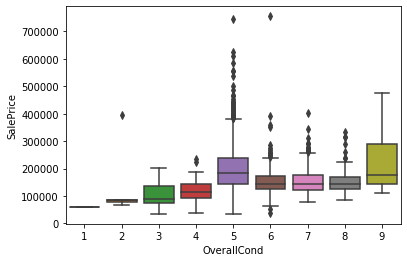

In [142]:
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

In [150]:
df['MSSubClass'].value_counts().sort_index() # The building class

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

#### Create a new feature Fireplace (*If house has a fireplace value is 1, if not 0*)

In [255]:
# Replace NaN values with 0
df['Fireplaces'] = df['Fireplaces'].fillna(0)

In [256]:
df['Fireplaces'].value_counts() #Number of fireplaces in a house

0.0    690
1.0    650
2.0    115
3.0      5
Name: Fireplaces, dtype: int64

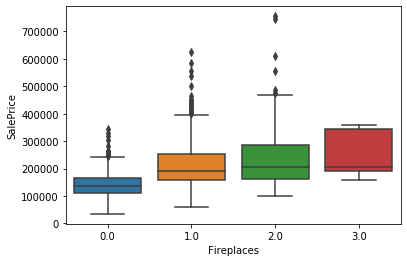

In [258]:
sns.boxplot(data=df, x='Fireplaces', y='SalePrice')

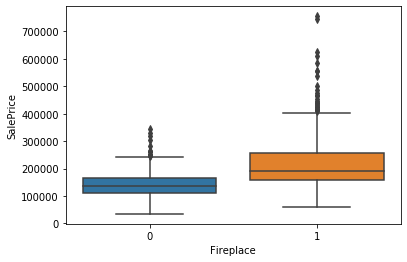

In [266]:
sns.boxplot(data=df, x='Fireplace', y='SalePrice')

In [ ]:
df['Fireplace'] = df['Fireplaces'].apply(lambda x : 0 if x==0 else 1)

# Drop old features Fireplaces
df = df.drop(['Fireplaces'], axis=1)

#### Replace fireplace quality labels with numbers

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(0)

In [257]:
df['FireplaceQu'].value_counts() #Fireplace condition

0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [260]:
# FireplaceQu: Fireplace quality
#        Ex	Excellent - Exceptional Masonry Fireplace => 5
#        Gd	Good - Masonry Fireplace in main level => 4
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement => 3
#        Fa	Fair - Prefabricated Fireplace in basement => 2
#        Po	Poor - Ben Franklin Stove => 1
#        NA	No Fireplace => 0

In [268]:
qual_nums = {'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}}
df.replace(qual_nums, inplace=True)

In [269]:
df['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

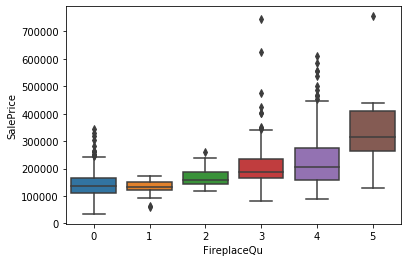

In [270]:
sns.boxplot(data=df, x='FireplaceQu', y='SalePrice')

In [77]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Fireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,61.0,2,2008,WD,Normal,208500,1
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,NaN,5,2007,WD,Normal,181500,1


### Check LotFrontage

In [87]:
df['LotFrontage'].describe() # Linear feet of street connected to property

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [95]:
df['LotFrontage'].median()

69.0

In [137]:
sns.lmplot(data=df, x='LotFrontage', y='SalePrice')

KeyError: "['LotFrontage'] not in index"

In [133]:
df = df.drop('LotFrontage', axis=1)

------------

---------

In [17]:
# df.isnull().sum().sort_values(ascending=False).head(17)

In [ ]:
# df.describe().transpose()

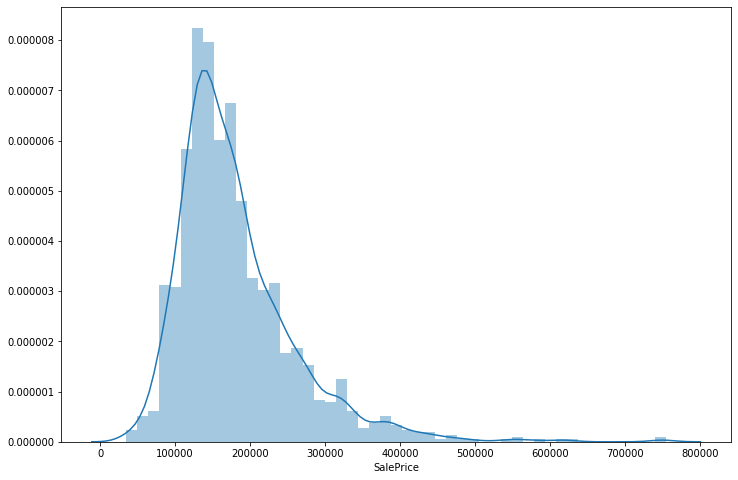

In [93]:
plt.figure(figsize=(12,8))
sns.distplot(df['SalePrice'])

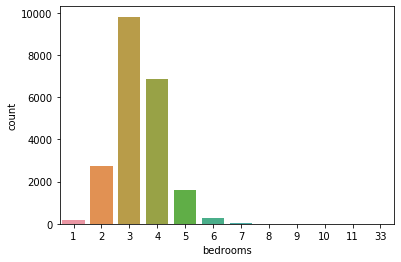

In [6]:
sns.countplot(df['bedrooms'])

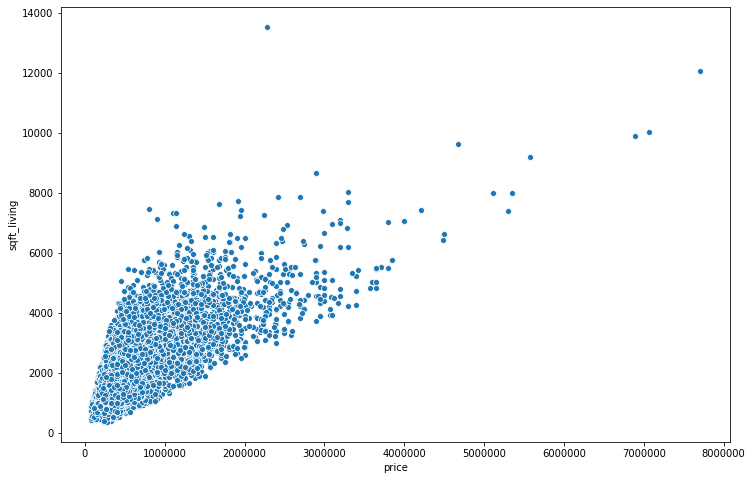

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

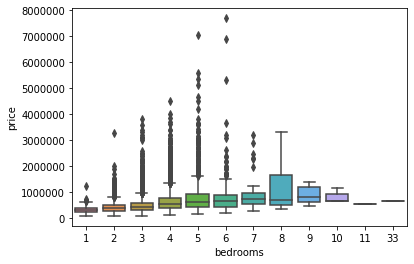

In [8]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [98]:
# Check for price outliers
df.sort_values('SalePrice',ascending=False).head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Fireplace
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,832,TA,TA,Y,1,2007,WD,Normal,755000,1
1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,813,TA,TA,Y,7,2007,WD,Abnorml,745000,1
1170,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,807,TA,TA,Y,7,2006,WD,Normal,625000,1
899,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,820,TA,TA,Y,3,2010,New,Partial,611657,1
804,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1020,TA,TA,Y,1,2009,New,Partial,582933,1
1047,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,716,TA,TA,Y,7,2006,New,Partial,556581,1
441,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,672,TA,TA,Y,4,2009,WD,Normal,555000,1
770,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,841,TA,TA,Y,6,2010,WD,Normal,538000,1
179,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,1166,TA,TA,Y,7,2009,New,Partial,501837,1


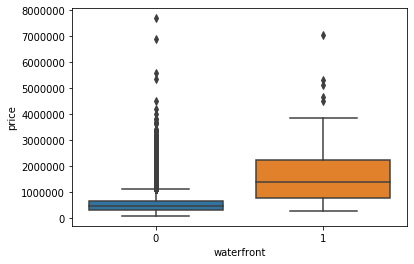

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)